In [22]:
import networkx as nx
from pyvis.network import Network
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Making the Network

### Correlation Matrix

In [23]:
df = pd.read_csv(r"C:\Users\MadiL\Thesis CodeBase\Cross-Sectional\Study1_data.csv")

lsas_columns = [col for col in df.columns if "LSAS" in col]
cfs_columns = [col for col in df.columns if "CFS" in col]
bdi_columns = [col for col in df.columns if "BDI" in col]

# Subset the dataframe
### If we want to use demographics, don't subset
df_subset = df[lsas_columns + cfs_columns + bdi_columns].copy()

# Reverse score CFS questions 2, 3, 5, 10 in place
reverse_columns = ['CFS_2_R', 'CFS_3_R', 'CFS_5_R', 'CFS_10_R']

# Apply the reverse scoring transformation in place
df_subset[reverse_columns] = 7 - df_subset[reverse_columns]


# Reverse the direction of all CFS columns by multiplying by -1
## Doing this to make sure that higher scores indicate worse cognitive flexibility
df_subset[cfs_columns] = df_subset[cfs_columns] * -1

# Renaming the BDI columns to BDI_1, BDI_2, etc. based on the order they appear
bdi_columns = [f"BDI_{i+1}" for i in range(len(bdi_columns))]
df_subset.columns = lsas_columns + cfs_columns + bdi_columns


# Compute the correlation matrix for the  data
correlation_matrix = df_subset.corr(method='spearman')



### Building a Network

In [24]:
# Set a correlation threshold to define a "strong" connection
threshold = 0.4

# Initialize an empty graph
G = nx.Graph()

# Add edges for pairs of questions that have a correlation above the threshold
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if np.abs(correlation_matrix.iloc[i, j]) > threshold:
            G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j],
                       weight=correlation_matrix.iloc[i, j])
            

# Number of nodes in the graph
print(f"Number of nodes: {G.number_of_nodes()}")

# Number of edges in the graph
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 56
Number of edges: 463


### Visualize the Network

Nodes:
['LSAS_1', 'LSAS_2', 'LSAS_3', 'LSAS_4', 'LSAS_5', 'LSAS_7', 'LSAS_8', 'LSAS_9', 'LSAS_10', 'LSAS_11', 'LSAS_12', 'LSAS_14', 'LSAS_16', 'LSAS_17', 'LSAS_18', 'LSAS_19', 'LSAS_20', 'LSAS_22', 'LSAS_23', 'LSAS_24', 'LSAS_6', 'LSAS_15', 'LSAS_21', 'CFS_2_R', 'CFS_3_R', 'CFS_10_R', 'LSAS_13', 'CFS_1', 'CFS_4', 'CFS_6', 'CFS_7', 'CFS_9', 'CFS_12', 'CFS_5_R', 'BDI_2', 'BDI_3', 'BDI_6', 'BDI_13', 'CFS_8', 'CFS_11', 'BDI_7', 'BDI_1', 'BDI_4', 'BDI_5', 'BDI_8', 'BDI_9', 'BDI_10', 'BDI_11', 'BDI_12', 'BDI_14', 'BDI_16', 'BDI_17', 'BDI_18', 'BDI_19', 'BDI_15', 'BDI_20']


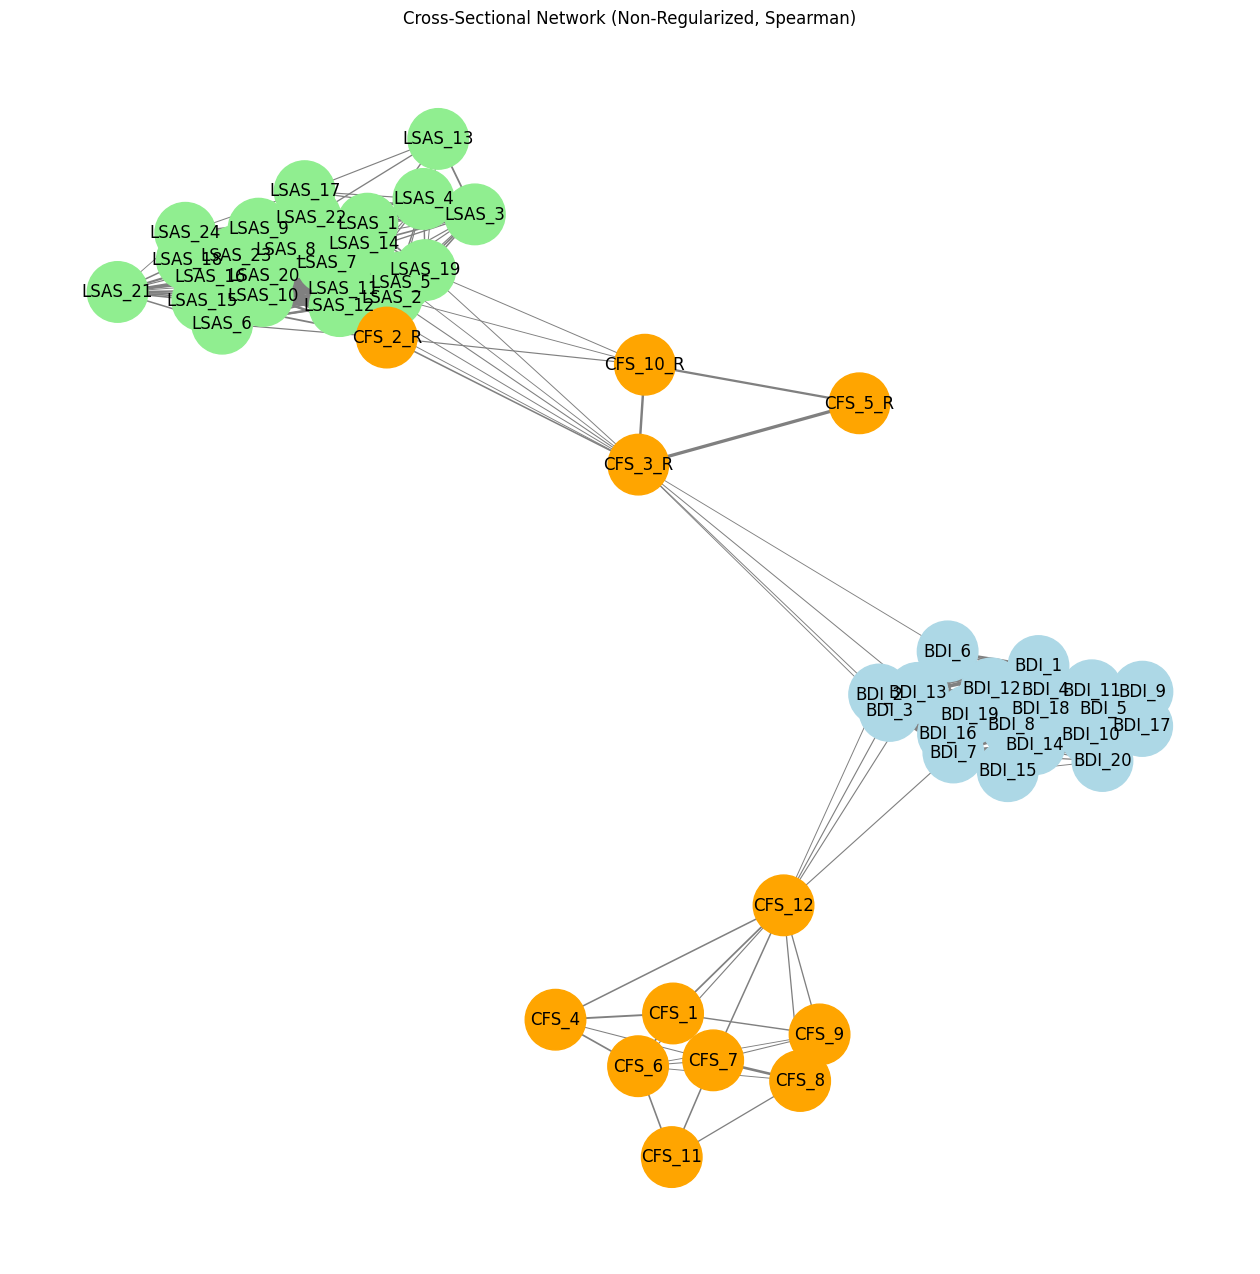

In [25]:
import networkx as nx
import matplotlib.pyplot as plt


# Define a function to color nodes based on their survey type
def get_node_color(node):
    if "LSAS" in node:
        return 'lightgreen'
    elif "CFS" in node:
        return 'orange'
    elif "BDI" in node:
        return 'lightblue'
    else:
        # If the node is not a survey question, delete it
        return 'blue'

# List of nodes
print("Nodes:")
print(G.nodes)
# Assign colors to nodes based on their labels
node_colors = [get_node_color(node) for node in G.nodes]

# Extract edge weights for edge thickness and apply non-linear scaling
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
scaled_weights = [abs(weight)**3 * 10 for weight in edge_weights]  # Non-linear scaling


# Define node positions using spring layout
pos = nx.spring_layout(G, seed=42)

# Create the plot
plt.figure(figsize=(16, 16))
plt.title("Cross-Sectional Network (Non-Regularized, Spearman)")

# Draw the graph with varying edge thickness
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1900, 
        width=scaled_weights, edge_color='gray')

# Show the plot
plt.show()


## Louvain Community Detection

Number of communities: 4
Modularity score: 0.5220


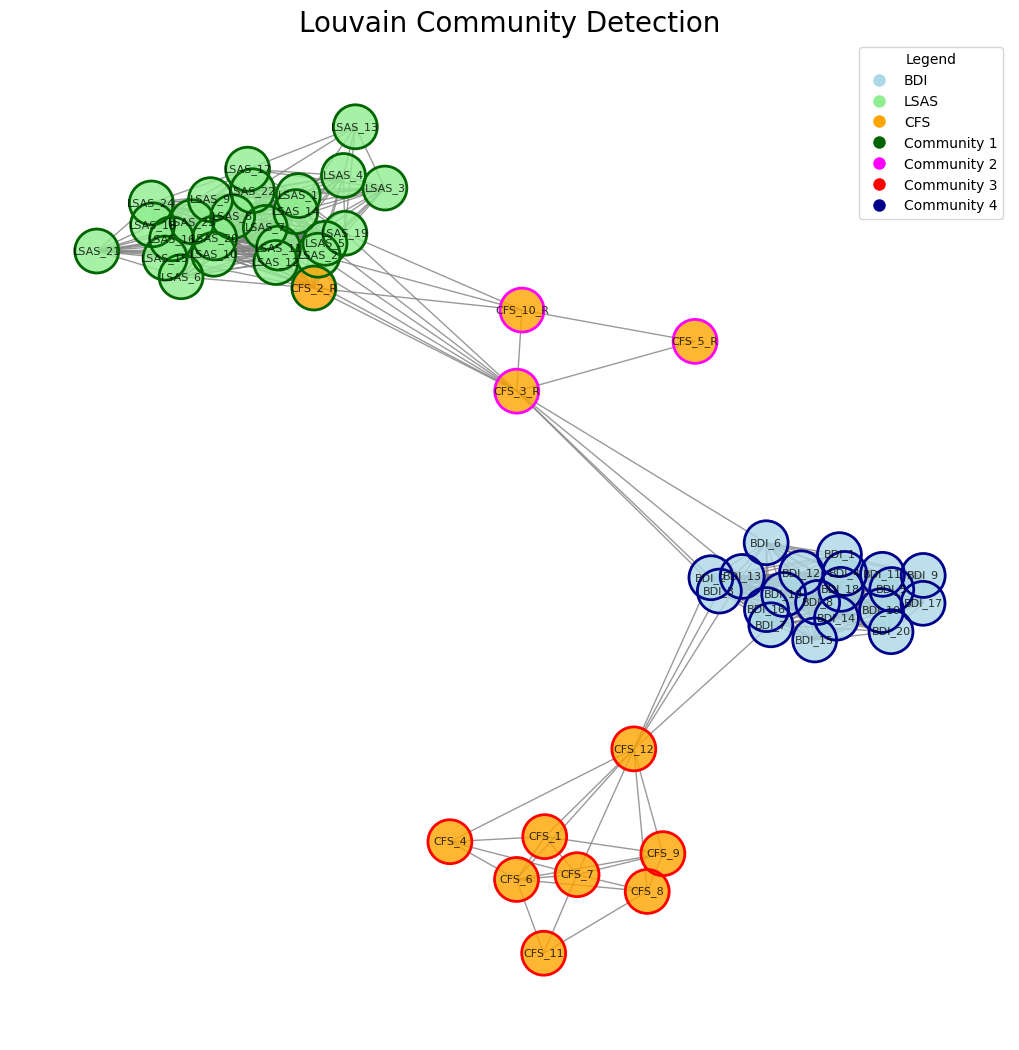

Community 1: {'LSAS_9', 'LSAS_14', 'LSAS_17', 'LSAS_16', 'LSAS_10', 'LSAS_4', 'LSAS_23', 'LSAS_12', 'LSAS_2', 'LSAS_6', 'LSAS_5', 'LSAS_3', 'LSAS_13', 'LSAS_24', 'LSAS_18', 'LSAS_1', 'CFS_2_R', 'LSAS_20', 'LSAS_8', 'LSAS_19', 'LSAS_22', 'LSAS_7', 'LSAS_21', 'LSAS_11', 'LSAS_15'}
Community 2: {'CFS_5_R', 'CFS_3_R', 'CFS_10_R'}
Community 3: {'CFS_6', 'CFS_9', 'CFS_7', 'CFS_8', 'CFS_11', 'CFS_4', 'CFS_12', 'CFS_1'}
Community 4: {'BDI_11', 'BDI_8', 'BDI_6', 'BDI_13', 'BDI_5', 'BDI_4', 'BDI_9', 'BDI_7', 'BDI_3', 'BDI_14', 'BDI_2', 'BDI_10', 'BDI_19', 'BDI_1', 'BDI_17', 'BDI_16', 'BDI_20', 'BDI_12', 'BDI_18', 'BDI_15'}


In [26]:
from networkx.algorithms import community
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm

# Louvain modularity optimization
communities = nx_comm.louvain_communities(G, seed=42)
modularity = community.modularity(G, communities)

print(f"Number of communities: {len(communities)}")
print(f"Modularity score: {modularity:.4f}")

# Define base colors for each test type
test_color_map = {
    'BDI': 'lightblue',
    'LSAS': 'lightgreen',
    'CFS': 'orange'
}

# Assign base colors to nodes based on their test type
node_colors = []
for node in G.nodes():
    if 'BDI' in node:
        node_colors.append(test_color_map['BDI'])
    elif 'LSAS' in node:
        node_colors.append(test_color_map['LSAS'])
    elif 'CFS' in node:
        node_colors.append(test_color_map['CFS'])

# Define custom colors for each community
outline_color_map = {
    0: "darkgreen",
    1: "magenta",
    2: "red",
    3: "darkblue"
}

# Assign outline colors based on detected community
outline_colors = []
for node in G.nodes():
    for i, community_nodes in enumerate(communities):
        if node in community_nodes:
            outline_colors.append(outline_color_map[i])  # Use custom colors
            break


# Fix the layout for consistent node positioning
pos = nx.spring_layout(G, seed=42)  # Define pos before plotting

# Plot the network with dual coloring
plt.figure(figsize=(10, 10))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    edge_color='gray',
    node_size=1000,
    font_size=8,
    alpha=0.8
)

# Draw node outlines for community differentiation
nx.draw_networkx_nodes(
    G,
    pos,
    node_size=1000,
    node_color='none',  # Transparent nodes
    edgecolors=outline_colors,  # Use community colors as outlines
    linewidths=2
)

# Create a legend for test types
handles_test = [
    plt.Line2D([0], [0], marker='o', color='w', label='BDI', markersize=10, markerfacecolor='lightblue'),
    plt.Line2D([0], [0], marker='o', color='w', label='LSAS', markersize=10, markerfacecolor='lightgreen'),
    plt.Line2D([0], [0], marker='o', color='w', label='CFS', markersize=10, markerfacecolor='orange')
]

# Create a legend for communities
handles_community = [
    plt.Line2D([0], [0], marker='o', color='w', label=f'Community {i+1}', markersize=10,
markerfacecolor=outline_color_map[i])
    for i in range(len(communities))
]

# Add legends for test types and communities
plt.legend(handles=handles_test + handles_community, loc='upper right', title="Legend")

plt.title('Louvain Community Detection', fontsize=20)
plt.show()

# Print list of each community
for i, community_nodes in enumerate(communities):
    print(f"Community {i + 1}: {community_nodes}")



## Louvain Bridge Centrality

In [27]:
import networkx as nx
from networkx.algorithms import community

def calculate_bridge_centrality(G, communities):
    """
    Calculate bridge centrality based on detected communities.

    Parameters:
    - G: NetworkX graph
    - communities: A list of sets, where each set contains nodes belonging to a detected community

    Returns:
    - bridge_centrality: A dictionary with nodes as keys and bridge centrality scores as values
    """
    bridge_centrality = {node: 0 for node in G.nodes()}
    
    # Create a mapping of nodes to their detected community
    node_community = {}
    for i, comm in enumerate(communities):
        for node in comm:
            node_community[node] = i  # Assign community ID
    
    # Iterate over all edges in the graph
    for node1, node2 in G.edges():
        if node_community[node1] != node_community[node2]:  # Check if they belong to different communities
            bridge_centrality[node1] += 1
            bridge_centrality[node2] += 1

    return bridge_centrality

# Run bridge centrality calculation
bridge_centrality_scores = calculate_bridge_centrality(G, communities)
# Print bridge centrality modularity
print(f"Bridge Centrality Modularity: {community.modularity(G, communities):.4f}")
print("Louvain Bridge Centrality Scores:")

# Top 5 central nodes for each test type (Bridge Centrality)
top_bridge_bdi = sorted([(node, bridge_centrality_scores[node]) for node in G.nodes() if 'BDI' in node],
    key=lambda x: x[1], reverse=True)[:3]
top_bridge_lsas = sorted([(node, bridge_centrality_scores[node]) for node in G.nodes() if 'LSAS' in node],
    key=lambda x: x[1], reverse=True)[:3]
top_bridge_cfs = sorted([(node, bridge_centrality_scores[node]) for node in G.nodes() if 'CFS' in node],
    key=lambda x: x[1], reverse=True)[:3]

# Print bridge centrality rankings
print("\nTop 3 Bridge Central Nodes for CFS:")
for node, centrality_score in top_bridge_cfs:
    print(f"Node: {node}, Bridge Centrality: {centrality_score}")

print("\nTop 3 Bridge Central Nodes for BDI:")
for node, centrality_score in top_bridge_bdi:
    print(f"Node: {node}, Bridge Centrality: {centrality_score}")

print("\nTop 3 Bridge Central Nodes for LSAS:")
for node, centrality_score in top_bridge_lsas:
    print(f"Node: {node}, Bridge Centrality: {centrality_score}")


# Get mean, median, and standard deviation for each test type
mean_bridge_bdi = sum(bridge_centrality_scores[node] for node in G.nodes() if 'BDI' in node) / len(top_bridge_bdi)
stddev_bridge_bdi = (sum((bridge_centrality_scores[node] - mean_bridge_bdi) ** 2 for node in G.nodes() if 'BDI' in node) / len(top_bridge_bdi)) ** 0.5

mean_bridge_lsas = sum(bridge_centrality_scores[node] for node in G.nodes() if 'LSAS' in node) / len(top_bridge_lsas)
stddev_bridge_lsas = (sum((bridge_centrality_scores[node] - mean_bridge_lsas) ** 2 for node in G.nodes() if 'LSAS' in node) / len(top_bridge_lsas)) ** 0.5

mean_bridge_cfs = sum(bridge_centrality_scores[node] for node in G.nodes() if 'CFS' in node) / len(top_bridge_cfs)
stddev_bridge_cfs = (sum((bridge_centrality_scores[node] - mean_bridge_cfs) ** 2 for node in G.nodes() if 'CFS' in node) / len(top_bridge_cfs)) ** 0.5

# Print mean, median, and standard deviation for each test type
print("\nMean and Standard Deviation for CFS:")
print(f"Mean: {mean_bridge_cfs}")
print(f"Standard Deviation: {stddev_bridge_cfs}")

print("\nMean and Standard Deviation for BDI:")
print(f"Mean: {mean_bridge_bdi}")
print(f"Standard Deviation: {stddev_bridge_bdi}")

print("\nMean and Standard Deviation for LSAS:")
print(f"Mean: {mean_bridge_lsas}")
print(f"Standard Deviation: {stddev_bridge_lsas}")

# Gather more insights about the bridge centrality scores and communities
# Calculate the average bridge centrality score for each community
community_bridge_centrality = {}
for i, community in enumerate(communities):
    community_bridge_centrality[i] = sum(bridge_centrality_scores[node] for node in community) / len(community)

# Print the average bridge centrality score for each community
print("\nAverage Bridge Centrality Score for Each Community:")
for i, centrality_score in community_bridge_centrality.items():
    print(f"Community {i + 1}: {centrality_score}")


Bridge Centrality Modularity: 0.5220
Louvain Bridge Centrality Scores:

Top 3 Bridge Central Nodes for CFS:
Node: CFS_3_R, Bridge Centrality: 10
Node: CFS_12, Bridge Centrality: 4
Node: CFS_10_R, Bridge Centrality: 3

Top 3 Bridge Central Nodes for BDI:
Node: BDI_2, Bridge Centrality: 2
Node: BDI_3, Bridge Centrality: 2
Node: BDI_13, Bridge Centrality: 2

Top 3 Bridge Central Nodes for LSAS:
Node: LSAS_2, Bridge Centrality: 2
Node: LSAS_19, Bridge Centrality: 2
Node: LSAS_5, Bridge Centrality: 1

Mean and Standard Deviation for CFS:
Mean: 6.333333333333333
Standard Deviation: 11.100550536897808

Mean and Standard Deviation for BDI:
Mean: 2.6666666666666665
Standard Deviation: 6.15238586662539

Mean and Standard Deviation for LSAS:
Mean: 2.3333333333333335
Standard Deviation: 6.027713773341709

Average Bridge Centrality Score for Each Community:
Community 1: 0.36
Community 2: 4.333333333333333
Community 3: 0.5
Community 4: 0.4


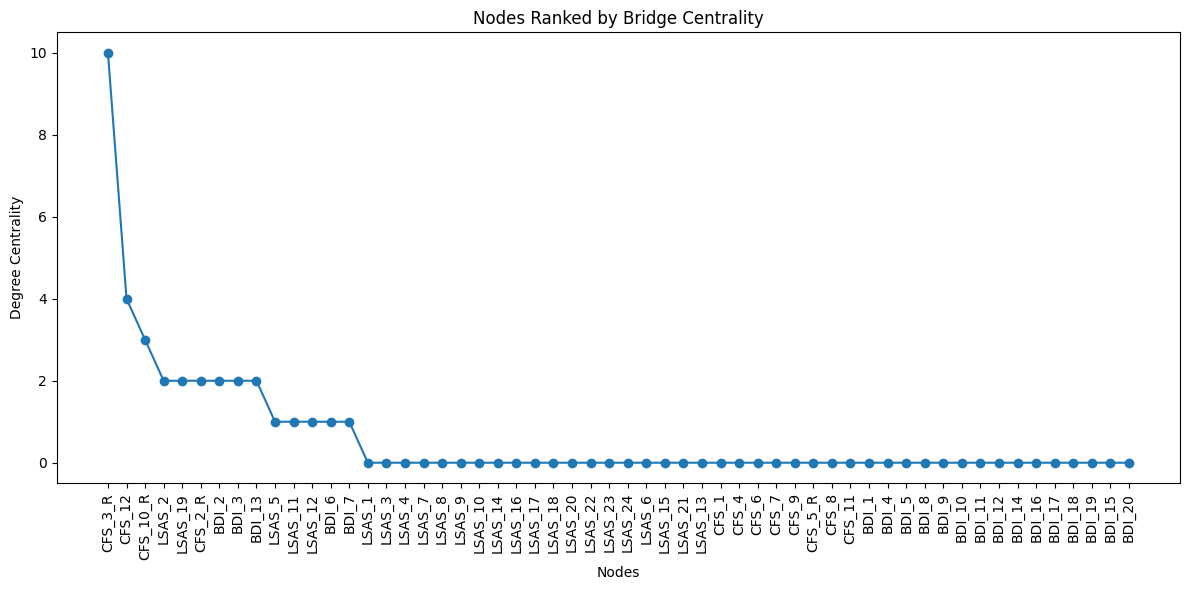

In [28]:
node_names = [node for node in G.nodes()]
centrality_scores = [bridge_centrality_scores[node] for node in G.nodes()]

# Sort nodes by their degree centrality scores in descending order
sorted_nodes = sorted(zip(node_names, centrality_scores), key=lambda x: x[1], reverse=True)
sorted_node_names, sorted_centrality_scores = zip(*sorted_nodes)

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(sorted_node_names, sorted_centrality_scores, marker='o')
plt.xticks(rotation=90)
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.title('Nodes Ranked by Bridge Centrality')
plt.tight_layout()
plt.show()

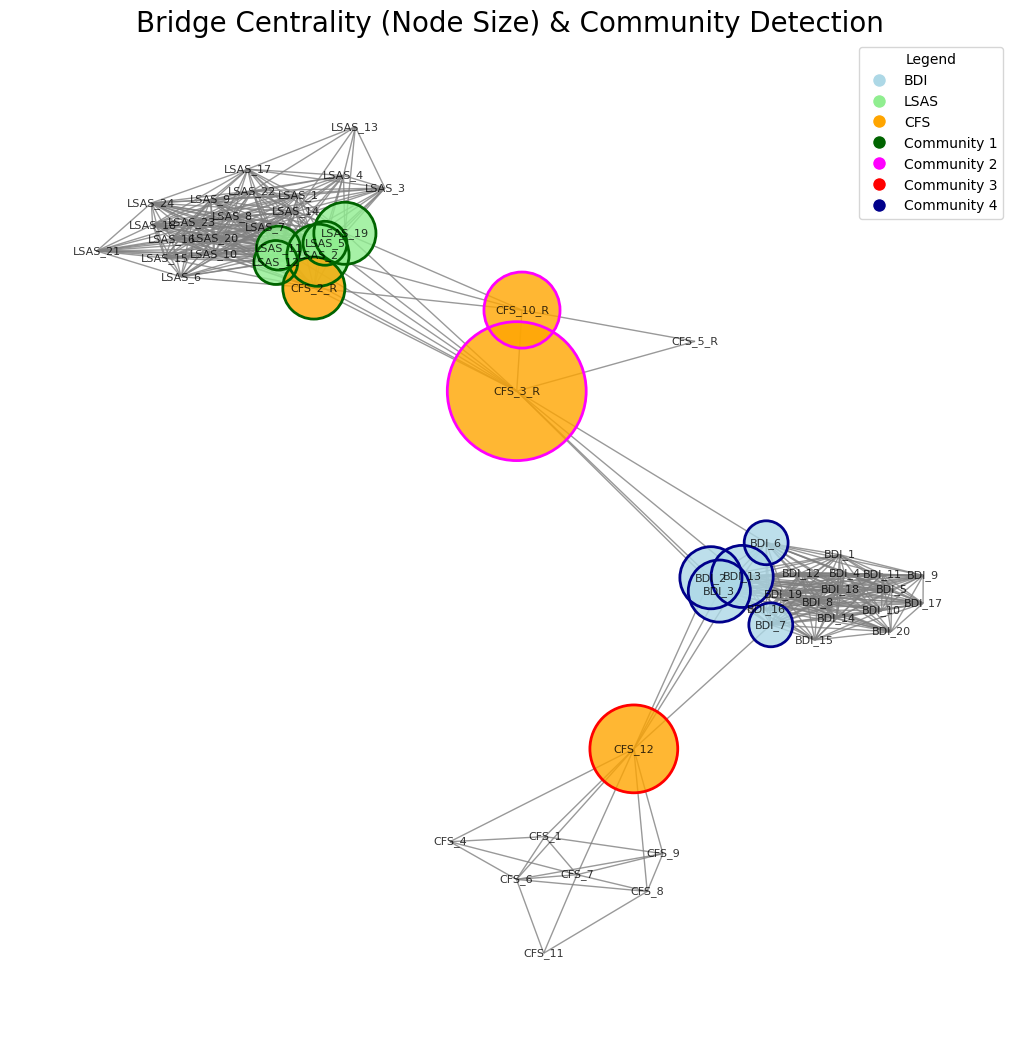

In [29]:
import matplotlib.pyplot as plt

# Define node sizes based on bridge centrality
node_sizes = [1000 * bridge_centrality_scores[node] for node in G.nodes()]

plt.figure(figsize=(10, 10))

# Draw network
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,  # Test-type colors
    edge_color='gray',
    node_size=node_sizes,
    font_size=8,
    alpha=0.8
)

# Draw node outlines to highlight communities
nx.draw_networkx_nodes(
    G,
    pos,
    node_size=node_sizes,
    node_color='none',
    edgecolors=outline_colors,  # Community colors as outlines
    linewidths=2
)

# Legends
plt.legend(handles=handles_test + handles_community, loc='upper right', title="Legend")
plt.title('Bridge Centrality (Node Size) & Community Detection', fontsize=20)
plt.show()


## Louvain Betweenness

### Nodes

In [30]:
import networkx as nx
from networkx.algorithms import community

# Calculate node betweenness centrality
betweenness_centrality_scores = nx.betweenness_centrality(G)

# Print betweenness centrality modularity
print(f"Betweenness Centrality Modularity: {community.modularity(G, communities):.4f}")
print("Louvain Betweenness Centrality Scores:")

# Print mean and standard deviation for betweenness centrality
mean_betweenness = sum(betweenness_centrality_scores.values()) / len(betweenness_centrality_scores)
stddev_betweenness = (sum((score - mean_betweenness) ** 2 for score in betweenness_centrality_scores.values()) / len(betweenness_centrality_scores)) ** 0.5

print("\nMean and Standard Deviation for Betweenness Centrality:")
print(f"Mean: {mean_betweenness}")
print(f"Standard Deviation: {stddev_betweenness}")

# Top 5 central nodes for each test type (Betweenness Centrality)
top_betweenness_bdi = sorted([(node, betweenness_centrality_scores[node]) for node in G.nodes() if 'BDI' in node],
    key=lambda x: x[1], reverse=True)[:3]
top_betweenness_lsas = sorted([(node, betweenness_centrality_scores[node]) for node in G.nodes() if 'LSAS' in node],
    key=lambda x: x[1], reverse=True)[:3]
top_betweenness_cfs = sorted([(node, betweenness_centrality_scores[node]) for node in G.nodes() if 'CFS' in node],
    key=lambda x: x[1], reverse=True)[:3]

# Print betweenness centrality rankings
print("\nTop 3 Betweenness Central Nodes for CFS:")
for node, centrality_score in top_betweenness_cfs:
    print(f"Node: {node}, Betweenness Centrality: {centrality_score}")

print("\nTop 3 Betweenness Central Nodes for BDI:")
for node, centrality_score in top_betweenness_bdi:
    print(f"Node: {node}, Betweenness Centrality: {centrality_score}")

print("\nTop 3 Betweenness Central Nodes for LSAS:")
for node, centrality_score in top_betweenness_lsas:
    print(f"Node: {node}, Betweenness Centrality: {centrality_score}")

# Get mean, median, and standard deviation for each test type
mean_betweenness_bdi = sum(betweenness_centrality_scores[node] for node in G.nodes() if 'BDI' in node) / len(top_betweenness_bdi)
stddev_betweenness_bdi = (sum((betweenness_centrality_scores[node] - mean_betweenness_bdi) ** 2 for node in G.nodes() if 'BDI' in node) / len(top_betweenness_bdi)) ** 0.5

mean_betweenness_lsas = sum(betweenness_centrality_scores[node] for node in G.nodes() if 'LSAS' in node) / len(top_betweenness_lsas)
stddev_betweenness_lsas = (sum((betweenness_centrality_scores[node] - mean_betweenness_lsas) ** 2 for node in G.nodes() if 'LSAS' in node) / len(top_betweenness_lsas)) ** 0.5

mean_betweenness_cfs = sum(betweenness_centrality_scores[node] for node in G.nodes() if 'CFS' in node) / len(top_betweenness_cfs)
stddev_betweenness_cfs = (sum((betweenness_centrality_scores[node] - mean_betweenness_cfs) ** 2 for node in G.nodes() if 'CFS' in node) / len(top_betweenness_cfs)) ** 0.5

# Print mean, median, and standard deviation for each test type
print("\nMean and Standard Deviation for CFS:")
print(f"Mean: {mean_betweenness_cfs}")
print(f"Standard Deviation: {stddev_betweenness_cfs}")

print("\nMean and Standard Deviation for BDI:")
print(f"Mean: {mean_betweenness_bdi}")
print(f"Standard Deviation: {stddev_betweenness_bdi}")

print("\nMean and Standard Deviation for LSAS:")
print(f"Mean: {mean_betweenness_lsas}")
print(f"Standard Deviation: {stddev_betweenness_lsas}")

# Gather more insights about the betweenness centrality scores and communities
# Calculate the average betweenness centrality score for each community
community_betweenness_centrality = {}
for i, community in enumerate(communities):
    community_betweenness_centrality[i] = sum(betweenness_centrality_scores[node] for node in community) / len(community)

# Print the average betweenness centrality score for each community
print("\nAverage Betweenness Centrality Score for Each Community:")
for i, centrality_score in community_betweenness_centrality.items():
    print(f"Community {i + 1}: {centrality_score}")



Betweenness Centrality Modularity: 0.5220
Louvain Betweenness Centrality Scores:

Mean and Standard Deviation for Betweenness Centrality:
Mean: 0.03164983164983166
Standard Deviation: 0.08137824643959313

Top 3 Betweenness Central Nodes for CFS:
Node: CFS_3_R, Betweenness Centrality: 0.5212682379349046
Node: CFS_12, Betweenness Centrality: 0.2268237934904602
Node: CFS_2_R, Betweenness Centrality: 0.03764189514189517

Top 3 Betweenness Central Nodes for BDI:
Node: BDI_2, Betweenness Centrality: 0.15071067821067818
Node: BDI_3, Betweenness Centrality: 0.15071067821067818
Node: BDI_13, Betweenness Centrality: 0.15071067821067818

Top 3 Betweenness Central Nodes for LSAS:
Node: LSAS_19, Betweenness Centrality: 0.0969525713717632
Node: LSAS_2, Betweenness Centrality: 0.0776760351507827
Node: LSAS_11, Betweenness Centrality: 0.07054921135729221

Mean and Standard Deviation for CFS:
Mean: 0.27579084495751166
Standard Deviation: 0.5103636401620252

Mean and Standard Deviation for BDI:
Mean: 0.

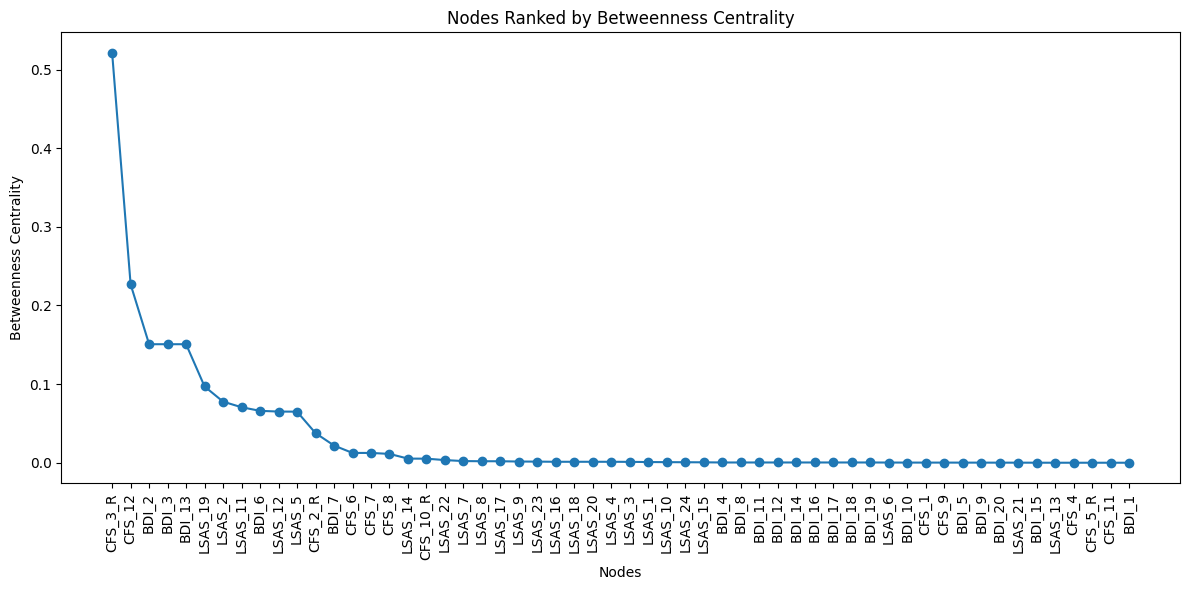

In [31]:
node_names = [node for node in G.nodes()]
centrality_scores = [betweenness_centrality_scores[node] for node in G.nodes()]

# Sort nodes by their betweenness centrality scores in descending order
sorted_nodes = sorted(zip(node_names, centrality_scores), key=lambda x: x[1], reverse=True)
sorted_node_names, sorted_centrality_scores = zip(*sorted_nodes)

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(sorted_node_names, sorted_centrality_scores, marker='o')
plt.xticks(rotation=90)
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Nodes Ranked by Betweenness Centrality')
plt.tight_layout()
plt.show()

## Degree Centrality

In [32]:
import matplotlib.pyplot as plt
import networkx as nx

# Degree centrality
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality Scores:")

# Top 5 central nodes for each test type (Degree Centrality)
top_degree_bdi = sorted([(node, degree_centrality[node]) for node in G.nodes() if 'BDI' in node],
    key=lambda x: x[1], reverse=True)[:3]
top_degree_lsas = sorted([(node, degree_centrality[node]) for node in G.nodes() if 'LSAS' in node],
    key=lambda x: x[1], reverse=True)[:3]
top_degree_cfs = sorted([(node, degree_centrality[node]) for node in G.nodes() if 'CFS' in node],
    key=lambda x: x[1], reverse=True)[:3]

# Print degree centrality rankings
print("\nTop 3 Degree Central Nodes for CFS:")
for node, centrality_score in top_degree_cfs:
    print(f"Node: {node}, Degree Centrality: {centrality_score}")

print("\nTop 3 Degree Central Nodes for BDI:")
for node, centrality_score in top_degree_bdi:
    print(f"Node: {node}, Degree Centrality: {centrality_score}")

print("\nTop 3 Degree Central Nodes for LSAS:")
for node, centrality_score in top_degree_lsas:
    print(f"Node: {node}, Degree Centrality: {centrality_score}")


# Get mean, median, and standard deviation for each test type
mean_degree_bdi = sum(degree_centrality[node] for node in G.nodes() if 'BDI' in node) / len(top_degree_bdi)
stddev_degree_bdi = (sum((degree_centrality[node] - mean_degree_bdi) ** 2 for node in G.nodes() if 'BDI' in node) / len(top_degree_bdi)) ** 0.5

mean_degree_lsas = sum(degree_centrality[node] for node in G.nodes() if 'LSAS' in node) / len(top_degree_lsas)
stddev_degree_lsas = (sum((degree_centrality[node] - mean_degree_lsas) ** 2 for node in G.nodes() if 'LSAS' in node) / len(top_degree_lsas)) ** 0.5

mean_degree_cfs = sum(degree_centrality[node] for node in G.nodes() if 'CFS' in node) / len(top_degree_cfs)
stddev_degree_cfs = (sum((degree_centrality[node] - mean_degree_cfs) ** 2 for node in G.nodes() if 'CFS' in node) / len(top_degree_cfs)) ** 0.5

# Print mean, median, and standard deviation for each test type
print("\nMean and Standard Deviation for CFS:")
print(f"Mean: {mean_degree_cfs}")
print(f"Standard Deviation: {stddev_degree_cfs}")

print("\nMean and Standard Deviation for BDI:")
print(f"Mean: {mean_degree_bdi}")
print(f"Standard Deviation: {stddev_degree_bdi}")

print("\nMean and Standard Deviation for LSAS:")
print(f"Mean: {mean_degree_lsas}")
print(f"Standard Deviation: {stddev_degree_lsas}")




Degree Centrality Scores:

Top 3 Degree Central Nodes for CFS:
Node: CFS_2_R, Degree Centrality: 0.3090909090909091
Node: CFS_3_R, Degree Centrality: 0.21818181818181817
Node: CFS_12, Degree Centrality: 0.18181818181818182

Top 3 Degree Central Nodes for BDI:
Node: BDI_2, Degree Centrality: 0.3818181818181818
Node: BDI_3, Degree Centrality: 0.3818181818181818
Node: BDI_13, Degree Centrality: 0.3818181818181818

Top 3 Degree Central Nodes for LSAS:
Node: LSAS_2, Degree Centrality: 0.45454545454545453
Node: LSAS_19, Degree Centrality: 0.45454545454545453
Node: LSAS_11, Degree Centrality: 0.43636363636363634

Mean and Standard Deviation for CFS:
Mean: 0.496969696969697
Standard Deviation: 0.7600686257741035

Mean and Standard Deviation for BDI:
Mean: 2.2666666666666666
Standard Deviation: 4.975121454434951

Mean and Standard Deviation for LSAS:
Mean: 2.848484848484848
Standard Deviation: 7.053092633907435


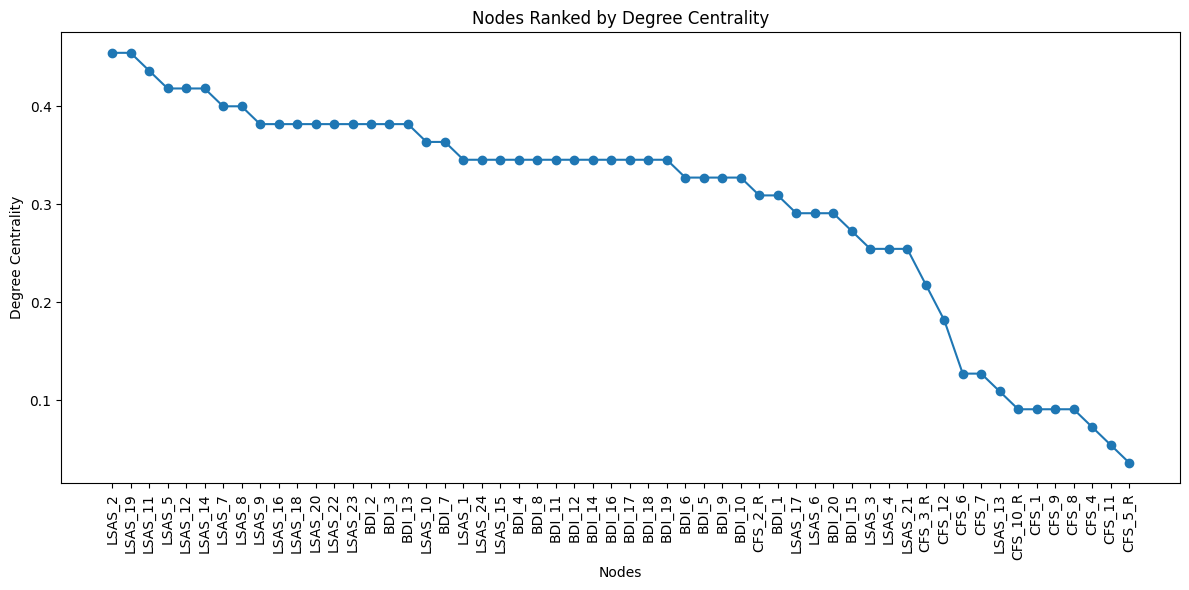

In [33]:

# Extract node names and their degree centrality scores
node_names = [node for node in G.nodes()]
centrality_scores = [degree_centrality[node] for node in G.nodes()]

# Sort nodes by their degree centrality scores in descending order
sorted_nodes = sorted(zip(node_names, centrality_scores), key=lambda x: x[1], reverse=True)
sorted_node_names, sorted_centrality_scores = zip(*sorted_nodes)

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(sorted_node_names, sorted_centrality_scores, marker='o')
plt.xticks(rotation=90)
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.title('Nodes Ranked by Degree Centrality')
plt.tight_layout()
plt.show()



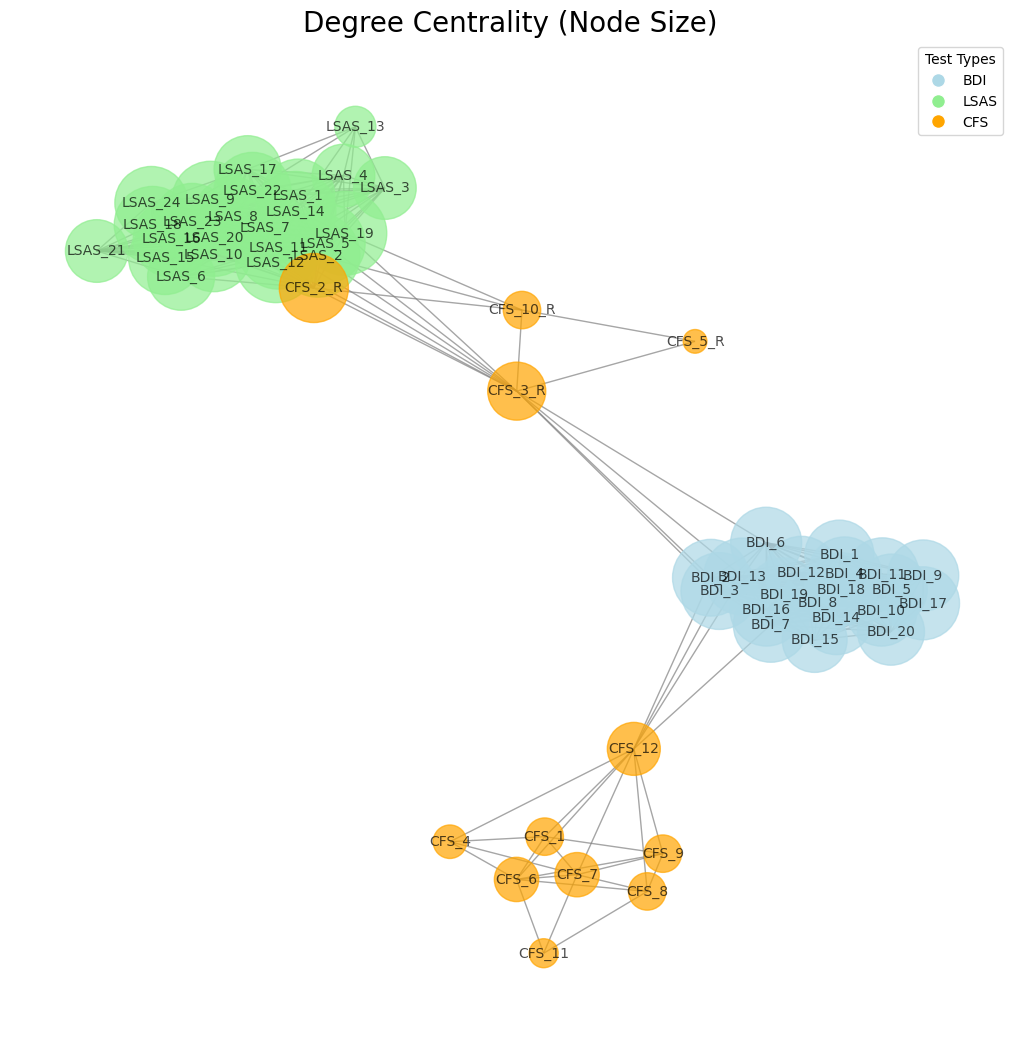

In [34]:
# Define color mapping by test type
color_map = []
for node in G.nodes():
    if 'BDI' in node:
        color_map.append('lightblue')
    elif 'LSAS' in node:
        color_map.append('lightgreen')
    elif 'CFS' in node:
        color_map.append('orange')

# Visualize centrality (Degree)
node_sizes = [8000 * degree_centrality[node] for node in G.nodes()]  # Adjusted scaling for clarity
plt.figure(figsize=(10, 10))  # Increase figure size
pos = nx.spring_layout(G, seed=42)  # Consistent layout for readability

# Draw the graph with color coding
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=node_sizes,
    node_color=color_map,  # Use color map based on test type
    font_size=10,  # Larger font size for labels
    font_color='black',
    edge_color='gray',
    alpha=0.7
)

# Add a legend for test types
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='BDI', markersize=10, markerfacecolor='lightblue'),
    plt.Line2D([0], [0], marker='o', color='w', label='LSAS', markersize=10, markerfacecolor='lightgreen'),
    plt.Line2D([0], [0], marker='o', color='w', label='CFS', markersize=10, markerfacecolor='orange')
]
plt.legend(handles=handles, loc='upper right', title="Test Types")

plt.title('Degree Centrality (Node Size)', fontsize=20)
plt.show()



## Strength Centrality

In [35]:
# Strength centrality (sum of edge weights for each node)
strength_centrality = {
    node: sum(abs(G[node][nbr]['weight']) for nbr in G.neighbors(node)) 
    for node in G.nodes()
}

# Top 5 central nodes for each test type (Strength Centrality)
top_strength_bdi = sorted([(node, strength_centrality[node]) for node in G.nodes() if 'BDI' in node],
    key=lambda x: x[1], reverse=True)[:3]
top_strength_lsas = sorted([(node, strength_centrality[node]) for node in G.nodes() if 'LSAS' in node],
    key=lambda x: x[1], reverse=True)[:3]
top_strength_cfs = sorted([(node, strength_centrality[node]) for node in G.nodes() if 'CFS' in node],
    key=lambda x: x[1], reverse=True)[:3]

# Print strength centrality rankings
print("\nTop 3 Strength Central Nodes for CFS:")
for node, centrality_score in top_strength_cfs:
    print(f"Node: {node}, Strength Centrality: {centrality_score}")

print("\nTop 3 Strength Central Nodes for BDI:")
for node, centrality_score in top_strength_bdi:
    print(f"Node: {node}, Strength Centrality: {centrality_score}")

print("\nTop 3 Strength Central Nodes for LSAS:")
for node, centrality_score in top_strength_lsas:
    print(f"Node: {node}, Strength Centrality: {centrality_score}")


# Get mean, median, and standard deviation for each test type
mean_strength_bdi = sum(strength_centrality[node] for node in G.nodes() if 'BDI' in node) / len(top_strength_bdi)
median_strength_bdi = sorted(strength_centrality.values(), key=lambda x: x, reverse=True)[len(top_strength_bdi) // 2]
stddev_strength_bdi = (sum((strength_centrality[node] - mean_strength_bdi) ** 2 for node in G.nodes() if 'BDI' in node) / len(top_strength_bdi)) ** 0.5

mean_strength_lsas = sum(strength_centrality[node] for node in G.nodes() if 'LSAS' in node) / len(top_strength_lsas)
median_strength_lsas = sorted(strength_centrality.values(), key=lambda x: x, reverse=True)[len(top_strength_lsas) // 2]
stddev_strength_lsas = (sum((strength_centrality[node] - mean_strength_lsas) ** 2 for node in G.nodes() if 'LSAS' in node) / len(top_strength_lsas)) ** 0.5

mean_strength_cfs = sum(strength_centrality[node] for node in G.nodes() if 'CFS' in node) / len(top_strength_cfs)
median_strength_cfs = sorted(strength_centrality.values(), key=lambda x: x, reverse=True)[len(top_strength_cfs) // 2]
stddev_strength_cfs = (sum((strength_centrality[node] - mean_strength_cfs) ** 2 for node in G.nodes() if 'CFS' in node) / len(top_strength_cfs)) ** 0.5

# Print mean, median, and standard deviation for each test type
print("\nMean and Standard Deviation for CFS:")
print(f"Mean: {mean_strength_cfs}")
print(f"Standard Deviation: {stddev_strength_cfs}")

print("\nMean and Standard Deviation for BDI:")
print(f"Mean: {mean_strength_bdi}")
print(f"Standard Deviation: {stddev_strength_bdi}")

print("\nMean and Standard Deviation for LSAS:")
print(f"Mean: {mean_strength_lsas}")
print(f"Standard Deviation: {stddev_strength_lsas}")




Top 3 Strength Central Nodes for CFS:
Node: CFS_2_R, Strength Centrality: 8.198155100862444
Node: CFS_3_R, Strength Centrality: 5.348909127335867
Node: CFS_12, Strength Centrality: 4.513451999432591

Top 3 Strength Central Nodes for BDI:
Node: BDI_13, Strength Centrality: 11.811900162225838
Node: BDI_3, Strength Centrality: 11.45392050638211
Node: BDI_7, Strength Centrality: 11.299415419360077

Top 3 Strength Central Nodes for LSAS:
Node: LSAS_11, Strength Centrality: 13.403652094118353
Node: LSAS_2, Strength Centrality: 13.328974770457378
Node: LSAS_12, Strength Centrality: 12.689767603322494

Mean and Standard Deviation for CFS:
Mean: 12.730175847856364
Standard Deviation: 19.470604761513798

Mean and Standard Deviation for BDI:
Mean: 64.83295703724434
Standard Deviation: 142.32699110694267

Mean and Standard Deviation for LSAS:
Mean: 80.51840343289349
Standard Deviation: 199.4015784787664


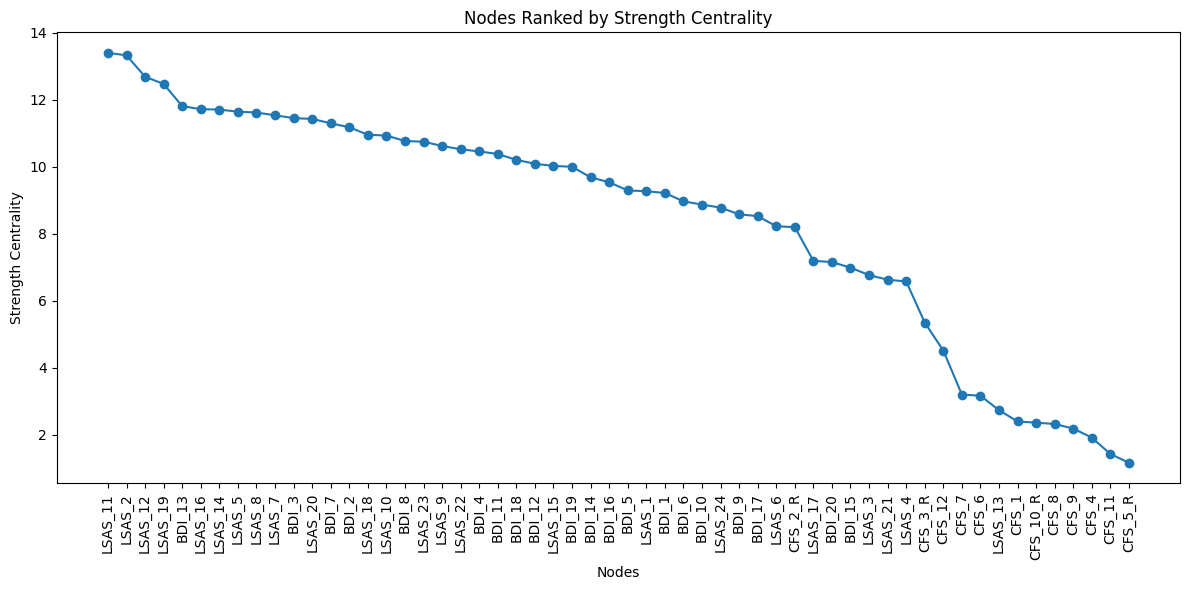

In [36]:
# Extract node names and their strength centrality scores
node_names = [node for node in G.nodes()]
strength_centrality_scores = [strength_centrality[node] for node in G.nodes()]

# Sort nodes by their strength centrality scores in descending order
sorted_nodes = sorted(zip(node_names, strength_centrality_scores), key=lambda x: x[1], reverse=True)
sorted_node_names, sorted_strength_centrality_scores = zip(*sorted_nodes)

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(sorted_node_names, sorted_strength_centrality_scores, marker='o')
plt.xticks(rotation=90)
plt.xlabel('Nodes')
plt.ylabel('Strength Centrality')
plt.title('Nodes Ranked by Strength Centrality')
plt.tight_layout()
plt.show()



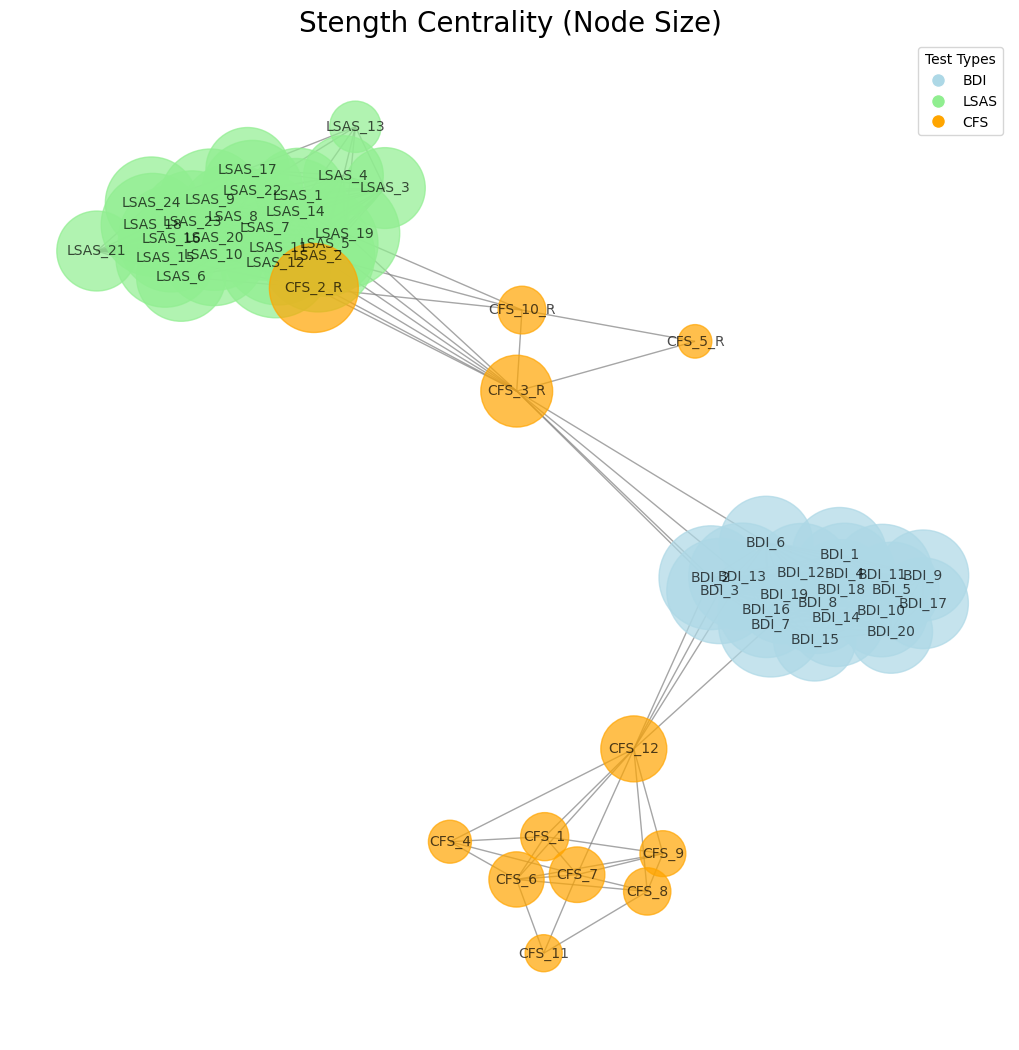

In [37]:
# Visualize centrality (Strength)
node_sizes = [500 * strength_centrality[node] for node in G.nodes()]  # Adjusted scaling for clarity
plt.figure(figsize=(10, 10))  # Increase figure size
pos = nx.spring_layout(G, seed=42)  # Consistent layout for readability

# Draw the graph with color coding
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=node_sizes,
    node_color=color_map,  # Use color map based on test type
    font_size=10,  # Larger font size for labels
    font_color='black',
    edge_color='gray',
    alpha=0.7
)
# Add a legend for test types
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='BDI', markersize=10, markerfacecolor='lightblue'),
    plt.Line2D([0], [0], marker='o', color='w', label='LSAS', markersize=10, markerfacecolor='lightgreen'),
    plt.Line2D([0], [0], marker='o', color='w', label='CFS', markersize=10, markerfacecolor='orange')
]
plt.legend(handles=handles, loc='upper right', title="Test Types")

plt.title('Stength Centrality (Node Size)', fontsize=20)
plt.show()


## Manual Bridge Centrality (Between-Tests)

In [38]:

def calculate_bridge_centrality(G, scale_groups):
    """
    Calculate bridge centrality for nodes connecting different scale groups.

    Parameters:
    - G: NetworkX graph
    - scale_groups: A dictionary where keys are scale names and values are lists of nodes belonging to each scale

    Returns:
    - bridge_centrality: A dictionary with nodes as keys and bridge centrality scores as values
    """
    bridge_centrality = {node: 0 for node in G.nodes()}
    
    # Iterate over all edges
    for node1, node2 in G.edges():
        group1 = next((scale for scale, nodes in scale_groups.items() if node1 in nodes), None)
        group2 = next((scale for scale, nodes in scale_groups.items() if node2 in nodes), None)
        
        # If the nodes belong to different groups, increment bridge centrality
        if group1 != group2:
            bridge_centrality[node1] += 1
            bridge_centrality[node2] += 1
    
    return bridge_centrality

# Example usage of bridge centrality calculation
# Define scale groups (modify according to your dataset)
scale_groups = {
    'LSAS': [col for col in df_subset.columns if 'LSAS' in col],
    'BDI': [col for col in df_subset.columns if 'BDI' in col],
    'CFS': [col for col in df_subset.columns if 'CFS' in col]
}
bridge_centrality_scores = calculate_bridge_centrality(G, scale_groups)



# Top 5 central nodes for each test type (Bridge Centrality)
top_bridge_bdi = sorted([(node, bridge_centrality_scores[node]) for node in G.nodes() if 'BDI' in node],
    key=lambda x: x[1], reverse=True)[:3]
top_bridge_lsas = sorted([(node, bridge_centrality_scores[node]) for node in G.nodes() if 'LSAS' in node],
    key=lambda x: x[1], reverse=True)[:3]
top_bridge_cfs = sorted([(node, bridge_centrality_scores[node]) for node in G.nodes() if 'CFS' in node],
    key=lambda x: x[1], reverse=True)[:3]

# Print bridge centrality rankings
print("\nTop 3 Bridge Central Nodes for CFS:")
for node, centrality_score in top_bridge_cfs:
    print(f"Node: {node}, Bridge Centrality: {centrality_score}")

print("\nTop 3 Bridge Central Nodes for BDI:")
for node, centrality_score in top_bridge_bdi:
    print(f"Node: {node}, Bridge Centrality: {centrality_score}")

print("\nTop 3 Bridge Central Nodes for LSAS:")
for node, centrality_score in top_bridge_lsas:
    print(f"Node: {node}, Bridge Centrality: {centrality_score}")


# Get mean, median, and standard deviation for each test type
mean_bridge_bdi = sum(bridge_centrality_scores[node] for node in G.nodes() if 'BDI' in node) / len(top_bridge_bdi)
median_bridge_bdi = sorted(bridge_centrality_scores.values(), key=lambda x: x, reverse=True)[len(top_bridge_bdi) // 2]
stddev_bridge_bdi = (sum((bridge_centrality_scores[node] - mean_bridge_bdi) ** 2 for node in G.nodes() if 'BDI' in node) / len(top_bridge_bdi)) ** 0.5

mean_bridge_lsas = sum(bridge_centrality_scores[node] for node in G.nodes() if 'LSAS' in node) / len(top_bridge_lsas)
median_bridge_lsas = sorted(bridge_centrality_scores.values(), key=lambda x: x, reverse=True)[len(top_bridge_lsas) // 2]
stddev_bridge_lsas = (sum((bridge_centrality_scores[node] - mean_bridge_lsas) ** 2 for node in G.nodes() if 'LSAS' in node) / len(top_bridge_lsas)) ** 0.5

mean_bridge_cfs = sum(bridge_centrality_scores[node] for node in G.nodes() if 'CFS' in node) / len(top_bridge_cfs)
median_bridge_cfs = sorted(bridge_centrality_scores.values(), key=lambda x: x, reverse=True)[len(top_bridge_cfs) // 2]
stddev_bridge_cfs = (sum((bridge_centrality_scores[node] - mean_bridge_cfs) ** 2 for node in G.nodes() if 'CFS' in node) / len(top_bridge_cfs)) ** 0.5

# Print mean, median, and standard deviation for each test type
print("\nMean and Standard Deviation for CFS:")
print(f"Mean: {mean_bridge_cfs}")
print(f"Standard Deviation: {stddev_bridge_cfs}")

print("\nMean and Standard Deviation for BDI:")
print(f"Mean: {mean_bridge_bdi}")
print(f"Standard Deviation: {stddev_bridge_bdi}")

print("\nMean and Standard Deviation for LSAS:")
print(f"Mean: {mean_bridge_lsas}")
print(f"Standard Deviation: {stddev_bridge_lsas}")



Top 3 Bridge Central Nodes for CFS:
Node: CFS_2_R, Bridge Centrality: 15
Node: CFS_3_R, Bridge Centrality: 9
Node: CFS_12, Bridge Centrality: 4

Top 3 Bridge Central Nodes for BDI:
Node: BDI_2, Bridge Centrality: 2
Node: BDI_3, Bridge Centrality: 2
Node: BDI_13, Bridge Centrality: 2

Top 3 Bridge Central Nodes for LSAS:
Node: LSAS_2, Bridge Centrality: 3
Node: LSAS_19, Bridge Centrality: 3
Node: LSAS_5, Bridge Centrality: 2

Mean and Standard Deviation for CFS:
Mean: 10.0
Standard Deviation: 17.568911937472585

Mean and Standard Deviation for BDI:
Mean: 2.6666666666666665
Standard Deviation: 6.15238586662539

Mean and Standard Deviation for LSAS:
Mean: 7.333333333333333
Standard Deviation: 18.33030277982336


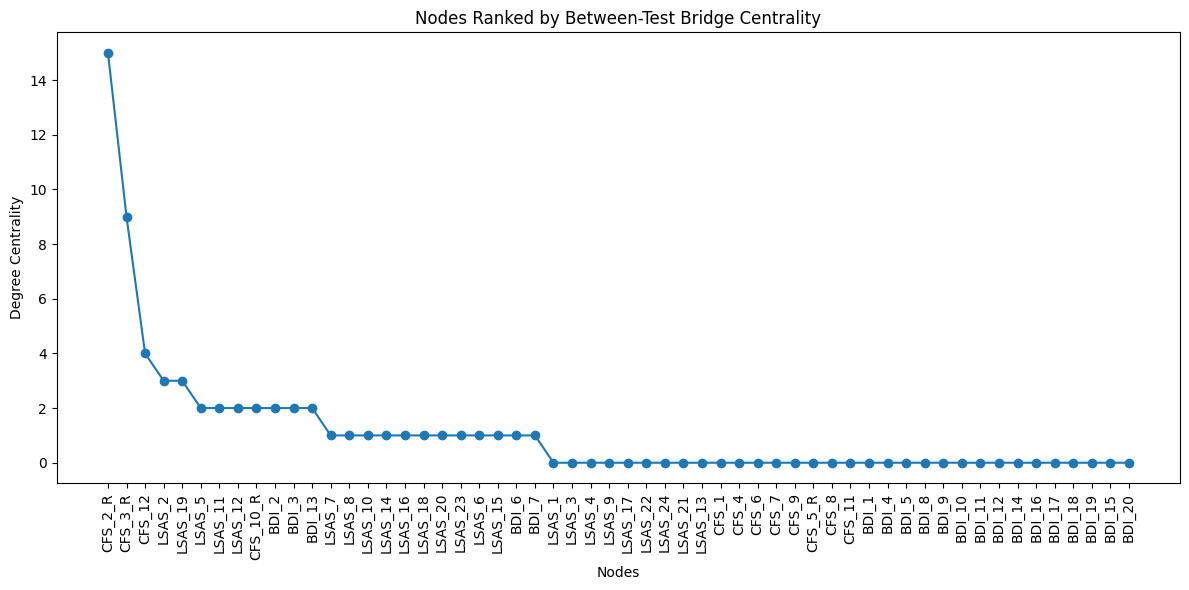

In [44]:
node_names = [node for node in G.nodes()]
centrality_scores = [bridge_centrality_scores[node] for node in G.nodes()]

# Sort nodes by their degree centrality scores in descending order
sorted_nodes = sorted(zip(node_names, centrality_scores), key=lambda x: x[1], reverse=True)
sorted_node_names, sorted_centrality_scores = zip(*sorted_nodes)

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(sorted_node_names, sorted_centrality_scores, marker='o')
plt.xticks(rotation=90)
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.title('Nodes Ranked by Between-Test Bridge Centrality')
plt.tight_layout()
plt.show()

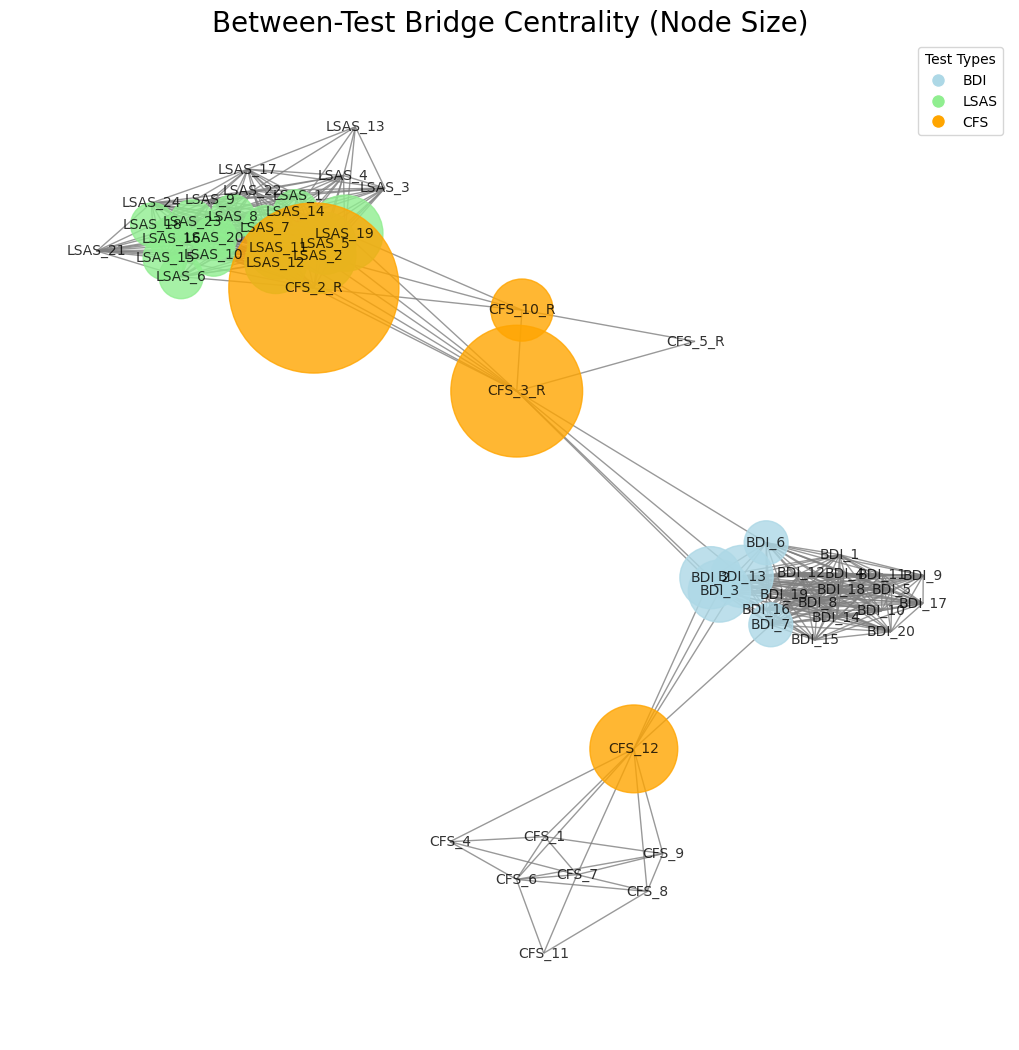

In [42]:
# Visualize the graph with bridge centrality and color coding by test type
node_sizes = [1000 * bridge_centrality_scores[node] for node in G.nodes()]

# Define color mapping by test type
color_map = []
for node in G.nodes():
    if 'BDI' in node:
        color_map.append('lightblue')
    elif 'LSAS' in node:
        color_map.append('lightgreen')
    elif 'CFS' in node:
        color_map.append('orange')

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # Consistent layout for readability

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=node_sizes,
    node_color=color_map,  # Use color map based on test type
    font_size=10,
    font_color='black',
    edge_color='gray',
    alpha=0.8
)

# Add a legend for test types
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='BDI', markersize=10, markerfacecolor='lightblue'),
    plt.Line2D([0], [0], marker='o', color='w', label='LSAS', markersize=10, markerfacecolor='lightgreen'),
    plt.Line2D([0], [0], marker='o', color='w', label='CFS', markersize=10, markerfacecolor='orange')
]
plt.legend(handles=handles, loc='upper right', title="Test Types")

plt.title('Between-Test Bridge Centrality (Node Size)', fontsize=20)
plt.show()


## Edge Weight Analysis

In [ ]:
# Analyze strongest edges across different tests
cross_scale_edges = []
for u, v, data in G.edges(data=True):
    group1 = next((scale for scale, nodes in scale_groups.items() if u in nodes), None)
    group2 = next((scale for scale, nodes in scale_groups.items() if v in nodes), None)
    if group1 != group2:
        cross_scale_edges.append((u, v, data['weight']))

# Sort cross-scale edges by absolute weight
sorted_cross_scale_edges = sorted(cross_scale_edges, key=lambda x: abs(x[2]), reverse=True)

print("Top 10 Strongest Edges - Across Tests:")
for u, v, weight in sorted_cross_scale_edges[:10]:
    print(f"Edge: ({u}, {v}), Weight: {weight:.4f}")
print("") # Empty line!!!
# Get edges sorted by absolute weight for within-scale analysis
sorted_edges = sorted(G.edges(data=True), key=lambda x: abs(x[2]['weight']), reverse=True)

print("Top 10 Strongest Edges - Absolute:")
for u, v, data in sorted_edges[:10]:
    print(f"Edge: ({u}, {v}), Weight: {data['weight']:.4f}")
print("") # Empty line!!!


# Get edges sorted by absolute weight
sorted_edges = sorted(G.edges(data=True), key=lambda x: abs(x[2]['weight']), reverse=True)


Top 10 Strongest Edges - Across Tests:
Edge: (LSAS_11, CFS_2), Weight: 0.5527
Edge: (LSAS_12, CFS_2), Weight: 0.5403
Edge: (LSAS_16, CFS_2), Weight: 0.5274
Edge: (LSAS_2, CFS_2), Weight: 0.5149
Edge: (LSAS_15, CFS_2), Weight: 0.5061
Edge: (LSAS_7, CFS_2), Weight: 0.5042
Edge: (LSAS_20, CFS_2), Weight: 0.4911
Edge: (LSAS_10, CFS_2), Weight: 0.4768
Edge: (LSAS_19, CFS_2), Weight: 0.4679
Edge: (LSAS_18, CFS_2), Weight: 0.4665

Top 10 Strongest Edges - Absolute:
Edge: (LSAS_11, LSAS_12), Weight: 0.8255
Edge: (BDI_3, BDI_13), Weight: 0.7408
Edge: (LSAS_10, LSAS_11), Weight: 0.7312
Edge: (BDI_4, BDI_11), Weight: 0.7301
Edge: (BDI_13, BDI_7), Weight: 0.7252
Edge: (BDI_7, BDI_8), Weight: 0.7242
Edge: (LSAS_8, LSAS_9), Weight: 0.7173
Edge: (LSAS_16, LSAS_20), Weight: 0.7092
Edge: (BDI_14, BDI_19), Weight: 0.7071
Edge: (LSAS_7, LSAS_23), Weight: 0.6975



## Predictability Analysis


Predictability Scores:
Node: LSAS_11, Predictability: 0.7637
Node: LSAS_12, Predictability: 0.7207
Node: BDI_13, Predictability: 0.7162
Node: BDI_3, Predictability: 0.6932
Node: BDI_7, Predictability: 0.6709
Node: LSAS_16, Predictability: 0.6555
Node: LSAS_20, Predictability: 0.6493
Node: BDI_8, Predictability: 0.6463
Node: BDI_19, Predictability: 0.6302
Node: LSAS_8, Predictability: 0.6295
Node: LSAS_10, Predictability: 0.6278
Node: BDI_4, Predictability: 0.6198
Node: BDI_11, Predictability: 0.6175
Node: LSAS_7, Predictability: 0.6156
Node: BDI_2, Predictability: 0.6148
Node: BDI_14, Predictability: 0.6121
Node: LSAS_2, Predictability: 0.5984
Node: LSAS_15, Predictability: 0.5957
Node: LSAS_9, Predictability: 0.5863
Node: LSAS_23, Predictability: 0.5775
Node: LSAS_6, Predictability: 0.5740
Node: BDI_18, Predictability: 0.5520
Node: BDI_12, Predictability: 0.5496
Node: LSAS_3, Predictability: 0.5477
Node: BDI_1, Predictability: 0.5416
Node: BDI_5, Predictability: 0.5387
Node: LSAS_14,

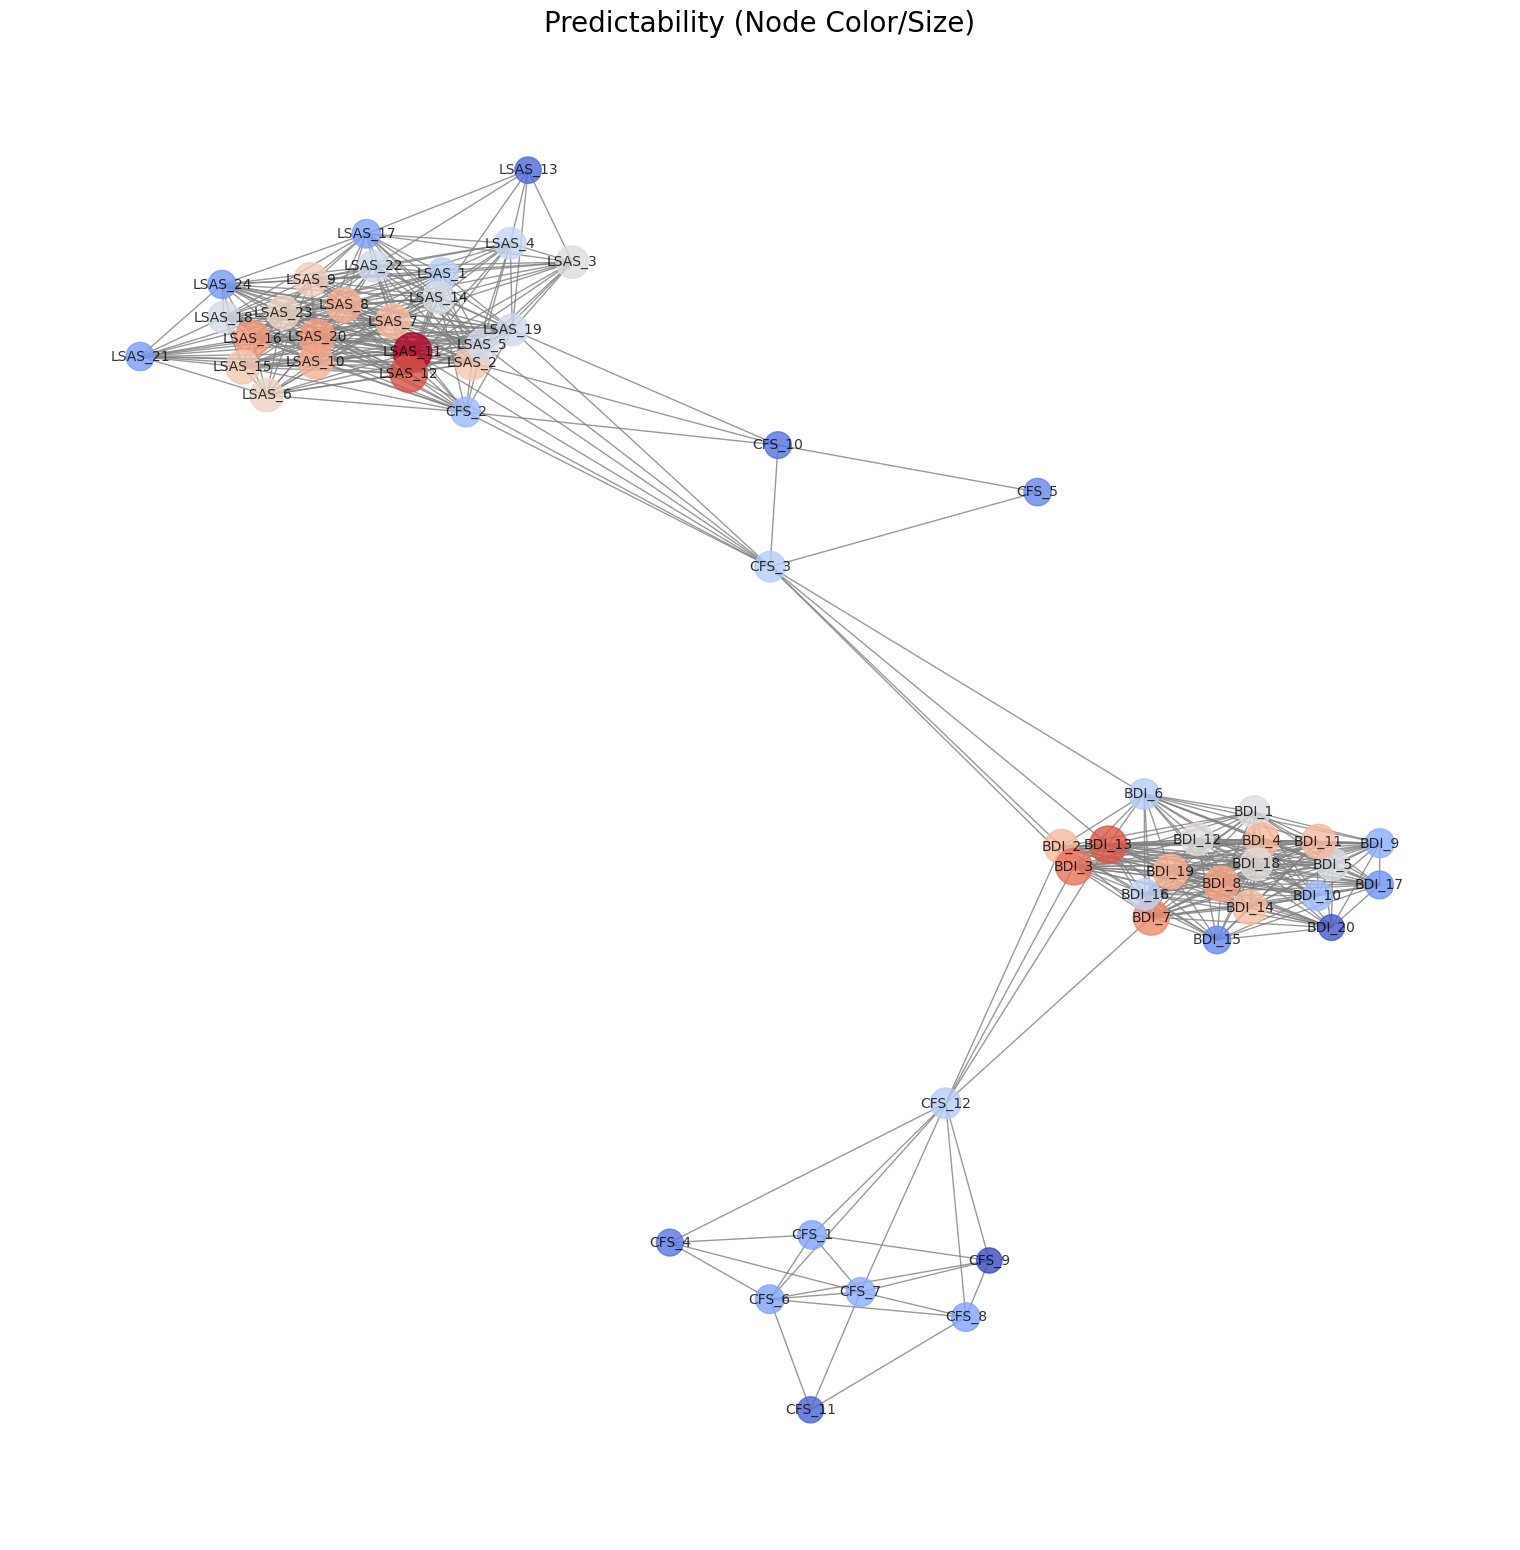

In [ ]:
predictability_scores = {}

for node in G.nodes():
    neighbors = list(G.neighbors(node))
    if not neighbors:
        predictability_scores[node] = 0
        continue
    
    # Prepare data for regression
    X = df_subset[neighbors]
    y = df_subset[node]
    
    # Fit linear regression model
    model = LinearRegression().fit(X, y)
    
    # Calculate R^2 as predictability
    predictability = model.score(X, y)
    predictability_scores[node] = predictability

# Display predictability scores
print("\nPredictability Scores:")
for node, score in sorted(predictability_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"Node: {node}, Predictability: {score:.4f}")

# Visualize predictability scores
node_sizes = [1000 * predictability_scores[node] for node in G.nodes()]
plt.figure(figsize=(15, 15))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=node_sizes,
    cmap=plt.cm.coolwarm,
    node_color=list(predictability_scores.values()),
    font_size=10,
    font_color='black',
    edge_color='gray',
    alpha=0.8
)
plt.title('Predictability (Node Color/Size)', fontsize=20)
plt.show()


## Descriptive Statistics From Antiquity

### Most/Least Connected Nodes

Shows nodes (questions) with the most and least degrees (number of connected edges)

In [ ]:
import networkx as nx

# Assuming G is your graph from the previous steps

# Calculate the degree of each node
degree_dict = dict(G.degree())

# Find the most connected question(s)
most_connected = max(degree_dict, key=degree_dict.get)
most_connected_degree = degree_dict[most_connected]

# Find the least connected question(s)
least_connected = min(degree_dict, key=degree_dict.get)
least_connected_degree = degree_dict[least_connected]

# Print the results
print(f"Most connected question: {most_connected}: degree {most_connected_degree}")
print(f"Least connected question: {least_connected}: degree {least_connected_degree}")

# Sort nodes by their degree in descending order
sorted_degree = sorted(degree_dict.items(), key=lambda item: item[1], reverse=True)

# Print the results
print("Questions and their degrees (from highest to lowest):")
for question, degree in sorted_degree:
    print(f"{question}: {degree}")

Most connected question: LSAS_2: degree 25
Least connected question: CFS_5: degree 2
Questions and their degrees (from highest to lowest):
LSAS_2: 25
LSAS_19: 25
LSAS_11: 24
LSAS_5: 23
LSAS_12: 23
LSAS_14: 23
LSAS_7: 22
LSAS_8: 22
LSAS_9: 21
LSAS_16: 21
LSAS_18: 21
LSAS_20: 21
LSAS_22: 21
LSAS_23: 21
BDI_2: 21
BDI_3: 21
BDI_13: 21
LSAS_10: 20
BDI_7: 20
LSAS_1: 19
LSAS_24: 19
LSAS_15: 19
BDI_4: 19
BDI_8: 19
BDI_11: 19
BDI_12: 19
BDI_14: 19
BDI_16: 19
BDI_17: 19
BDI_18: 19
BDI_19: 19
BDI_6: 18
BDI_5: 18
BDI_9: 18
BDI_10: 18
CFS_2: 17
BDI_1: 17
LSAS_17: 16
LSAS_6: 16
BDI_20: 16
BDI_15: 15
LSAS_3: 14
LSAS_4: 14
LSAS_21: 14
CFS_3: 12
CFS_12: 10
CFS_6: 7
CFS_7: 7
LSAS_13: 6
CFS_10: 5
CFS_1: 5
CFS_9: 5
CFS_8: 5
CFS_4: 4
CFS_11: 3
CFS_5: 2


### Correlation Pairs (within-test allowed)

In [ ]:
import pandas as pd
import numpy as np

# Assuming correlation_matrix is your DataFrame with correlations

# Set the diagonal elements to NaN to avoid self-pairing
np.fill_diagonal(correlation_matrix.values, np.nan)

# Find the maximum correlation value in the matrix
max_corr = correlation_matrix.max().max()

# Find the minimum correlation value in the matrix
min_corr = correlation_matrix.min().min()

# Find the pairs with the maximum correlation
max_corr_pairs = np.where(correlation_matrix == max_corr)
max_corr_questions = list(zip(correlation_matrix.columns[max_corr_pairs[0]], correlation_matrix.columns[max_corr_pairs[1]]))

# Find the pairs with the minimum correlation
min_corr_pairs = np.where(correlation_matrix == min_corr)
min_corr_questions = list(zip(correlation_matrix.columns[min_corr_pairs[0]], correlation_matrix.columns[min_corr_pairs[1]]))

# Print the results
print(f"Maximum correlation value: {max_corr}")
print("Pairs with the maximum correlation:")
for pair in max_corr_questions:
    print(f"{pair[0]} and {pair[1]}")

print(f"\nMinimum correlation value: {min_corr}")
print("Pairs with the minimum correlation:")
for pair in min_corr_questions:
    print(f"{pair[0]} and {pair[1]}")



Maximum correlation value: 0.8255345535187689
Pairs with the maximum correlation:
LSAS_11 and LSAS_12
LSAS_12 and LSAS_11

Minimum correlation value: 0.054716154606427314
Pairs with the minimum correlation:
LSAS_6 and CFS_11
CFS_11 and LSAS_6


In [ ]:
import pandas as pd
import numpy as np

# Assuming correlation_matrix is your DataFrame with correlations

# Set the diagonal elements to NaN to avoid self-pairing
np.fill_diagonal(correlation_matrix.values, np.nan)

# Function to determine if two columns belong to different tests
def different_tests(col1, col2):
    if (col1 in lsas_columns and col2 in lsas_columns) or \
       (col1 in cfs_columns and col2 in cfs_columns) or \
       (col1 in bdi_columns and col2 in bdi_columns):
        return False
    return True

# Function to get top N unique pairs (max or min correlations)
def get_top_n_pairs(correlation_matrix, n, max_or_min="max"):
    # Flatten the matrix to get correlations and pairs
    corr_unstacked = correlation_matrix.unstack()
    
    # Sort by correlation value
    if max_or_min == "max":
        sorted_corr = corr_unstacked.sort_values(ascending=False)
    else:
        sorted_corr = corr_unstacked.sort_values(ascending=True)
    
    # Filter out reverse pairs and pairs from the same test
    unique_pairs = []
    seen = set()
    for (col1, col2), corr_value in sorted_corr.items():
        if (col1, col2) not in seen and (col2, col1) not in seen and different_tests(col1, col2):
            unique_pairs.append((col1, col2, corr_value))
            seen.add((col1, col2))
            seen.add((col2, col1))  # Mark reverse pair as seen
        if len(unique_pairs) == n:
            break
    return unique_pairs

# Get 5 unique pairs with the highest correlations
highest_corr_pairs = get_top_n_pairs(correlation_matrix, 5, max_or_min="max")

# Get 5 unique pairs with the lowest correlations
lowest_corr_pairs = get_top_n_pairs(correlation_matrix, 5, max_or_min="min")

# Print the results
print("Top 5 pairs with the highest correlation (from different tests):")
for pair in highest_corr_pairs:
    print(f"{pair[0]} and {pair[1]} with correlation {pair[2]:.4f}")

print("\nTop 5 pairs with the lowest correlation (from different tests):")
for pair in lowest_corr_pairs:
    print(f"{pair[0]} and {pair[1]} with correlation {pair[2]:.4f}")


Top 5 pairs with the highest correlation (from different tests):
CFS_2 and LSAS_11 with correlation 0.5527
CFS_2 and LSAS_12 with correlation 0.5403
LSAS_16 and CFS_2 with correlation 0.5274
LSAS_2 and CFS_2 with correlation 0.5149
CFS_2 and LSAS_15 with correlation 0.5061

Top 5 pairs with the lowest correlation (from different tests):
LSAS_6 and CFS_11 with correlation 0.0547
LSAS_21 and CFS_11 with correlation 0.0594
CFS_4 and LSAS_13 with correlation 0.0749
LSAS_15 and CFS_11 with correlation 0.0865
CFS_11 and BDI_15 with correlation 0.0885
